Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


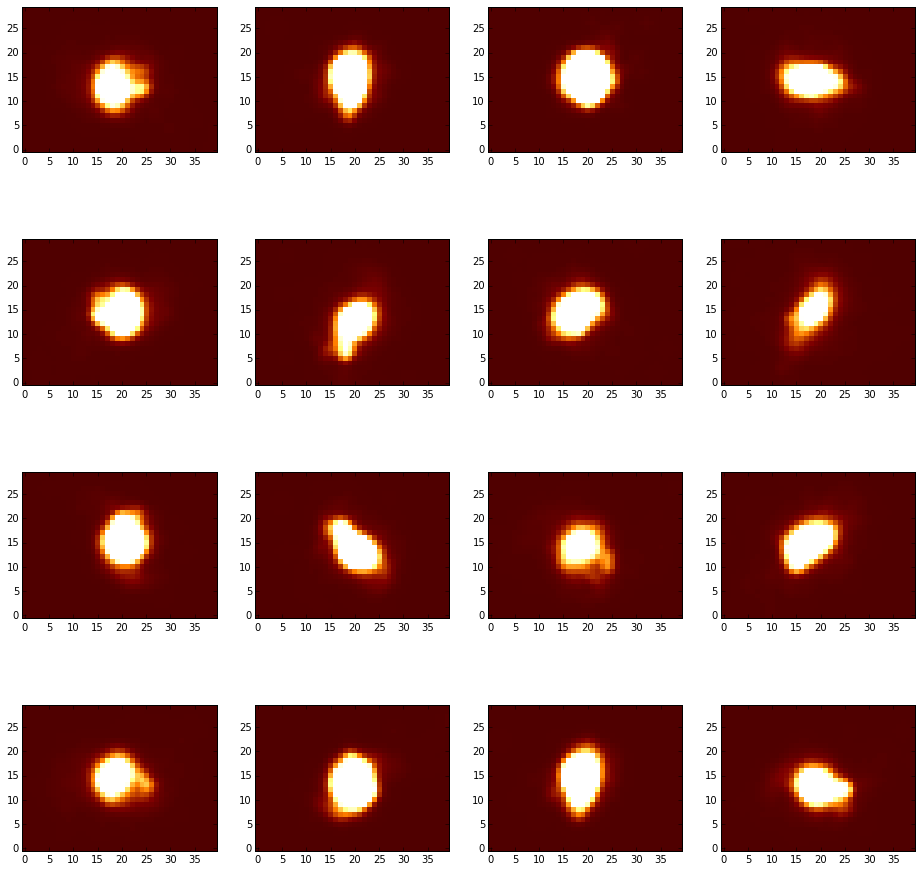

In [11]:
%pylab inline

import numpy
import astrohack_projections
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 16, 16
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

file_path = "./illustris_galaxies/cutout_83.hdf5"
illustris_gal = astrohack_projections.illustris_model_and_image(file_path)
illustris_gal.set_image_shape((30, 40))

for i in xrange(16):
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, size=3)
    intensity = 1 #numpy.random.uniform(100.0, 150.0)
    scale = 0.25 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(13., 16.)
    yshift = numpy.random.uniform(18., 21.)
    psf_size = 1.
    bg = 0.
    
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0, 'psf_size':psf_size}
    illustris_gal.set_image_parameters(**kwargs)
    illustris_gal.construct_image()
    
    plt.subplot(4, 4, i+1)
    a, mid = numpy.percentile(illustris_gal.get_image(), [15., 85.])
    ran = mid - a
    vmin = mid - 5. * ran
    vmax = mid + 20. * ran
    plt.imshow(illustris_gal.get_image(), vmin=vmin, vmax=vmax, **plot_kwargs)